In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape
x_train = x_train.astype("float32") / 255.0
x_train = x_train.reshape(-1, 784)

# -----------------------------
# Generator Model
# -----------------------------
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(256, activation="relu", input_shape=(100,)),
        layers.Dense(512, activation="relu"),
        layers.Dense(784, activation="sigmoid")
    ])
    return model


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(256, activation="relu", input_shape=(100,)),
        layers.Dense(512, activation="relu"),
        layers.Dense(784, activation="sigmoid")
    ])
    return model

# -----------------------------
# Discriminator Model
# -----------------------------
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(512, activation="relu", input_shape=(784,)),
        layers.Dense(256, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

In [4]:
generator = build_generator()
discriminator = build_discriminator()

# Compile discriminator
discriminator.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Freeze discriminator in GAN
discriminator.trainable = False

# Combined GAN model
gan = tf.keras.Sequential([generator, discriminator])
gan.compile(
    optimizer="adam",
    loss="binary_crossentropy"
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
epochs = 1000
batch_size = 64

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]

    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_images = generator.predict(noise, verbose=0)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    discriminator.trainable = True
    discriminator.train_on_batch(real_images, real_labels)
    discriminator.train_on_batch(fake_images, fake_labels)


In [8]:
noise = np.random.normal(0, 1, (batch_size, 100))
misleading_labels = np.ones((batch_size, 1))

discriminator.trainable = False
gan.train_on_batch(noise, misleading_labels)

if epoch % 200 == 0:
    print(f"Epoch {epoch} completed")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


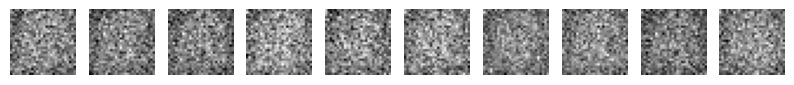

In [9]:
noise = np.random.normal(0, 1, (10, 100))
generated_images = generator.predict(noise)

plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(generated_images[i].reshape(28,28), cmap="gray")
    plt.axis("off")
plt.show()